
> ### Use the MNIST dataset to build the NN model that detects the handwritten digits

In [7]:
# Import necessary packages

'''the helper is a custom built helper 
to display the images and graphs'''

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

### download the MNIST dataset

In [8]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data with mean and sd 0.5
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## the trainloader is the the iterator over the entire data set which in each iteration
## extracts 64 shuffled images

In [9]:
## create an iterator over the trainloader 
# which in itself is an iterator

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


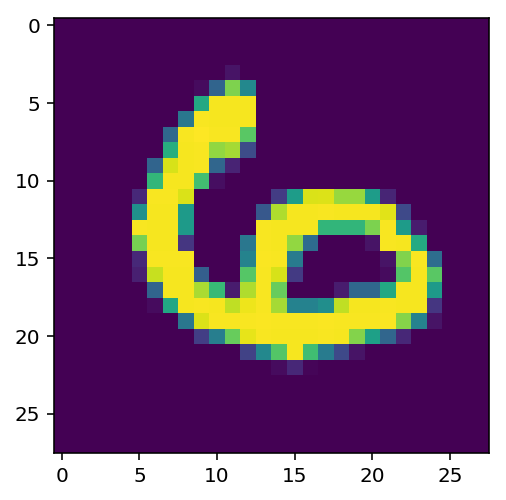

In [10]:
# dislplay a sample image
plt.imshow(images[63].numpy().squeeze());

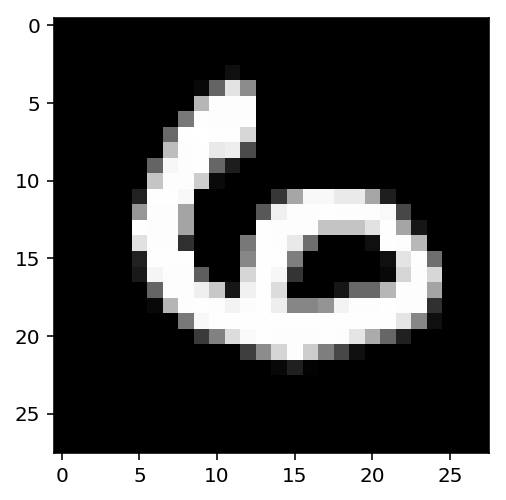

In [11]:
## display a sample image in grayscale
# this is what is used in our neural network, 
# that is we take only single layer of image
plt.imshow(images[63].numpy().squeeze(), cmap='Greys_r');

In [12]:
# activation function

def activation(x):
    return 1/(1+torch.exp(-x))

# flatten the tensors from [64, 1, 28, 28] to [64, 784]
# images.shape[0] gives the batch size that is 64, 
# and the argument -1 flatens the tensor
inputs = images.view(images.shape[0], -1) # features [64, 784]
print(inputs.shape)

# parameters
w1 = torch.randn(784, 256) # first weight matrix [784, 256]
print(w1.shape)
b1 = torch.randn(256) # first set of 256 bias units
w2 = torch.randn(256, 10) # second weight matrix [256, 10]
print(w2.shape)
b2 = torch.randn(10) # second set of 10 bias units

h = activation(torch.mm(inputs, w1) + b1)
print('h',h.shape)
out = torch.mm(h, w2) +b2
print('out',out.shape)

# print(out)

torch.Size([64, 784])
torch.Size([784, 256])
torch.Size([256, 10])
h torch.Size([64, 256])
out torch.Size([64, 10])


In [13]:

"""
    define softmax: 
    input = x, a [64x10] tensor
    dim=1 means we sum across the columns,
    torch.sum(torch.exp(x), dim=1) is the sum of [64x1] vector that is of a single column,
    however, we want the sum of all the elements across the row of tensor x, [64x10], since
    each row represents a single image
    so we use torch.sum(torch.exp(x), dim=1).view(-1,1)
"""
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

# always verify the shape: it should be [64,10]
print(probabilities.shape)

# the probabilitis should sum to 1 like any proper probabilities
print(probabilities.sum(dim=1))


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### pytorch's nn module can be used to define the neural network architecture. Here we build the network with 784 input units, 256 hidden units, 10 output units and a softmax output

In [14]:
from torch import nn

In [15]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        # inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        
        # output layer
        self.output = nn.Linear(256, 10)
        
        # sigmoid activation and softmax
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        #pass the input tensor through each of our operation
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [16]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

### nn.functional can also be used instead of nn,

In [17]:
import torch.nn.functional as F

In [18]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [19]:
# displays the model
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [20]:
"""create a network with 
    784 input units, 
    a hidden layer with 128 units and a ReLu activation, 
    a hidden layer with 64 units and a ReLu activation, 
    and an output layer with a softmax activation"""
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
    def forward(self, x):
        '''forward pass through the network
            returns the output logits whose prob. sum to 1'''
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        
        return x

In [21]:
model = Network()
model

Network(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
)

In [22]:
'''Initializing weight and biases: 
    weights and biases are automatically initialized'''

# use model.layer_name.weight to check the initialization
print(model.layer1.weight)
print(model.layer1.bias)

Parameter containing:
tensor([[ 0.0183,  0.0028,  0.0037,  ...,  0.0245,  0.0303, -0.0257],
        [-0.0336,  0.0272, -0.0352,  ..., -0.0022, -0.0196, -0.0139],
        [ 0.0156,  0.0085, -0.0083,  ..., -0.0139,  0.0200,  0.0175],
        ...,
        [ 0.0111, -0.0356, -0.0351,  ...,  0.0105,  0.0112, -0.0060],
        [ 0.0137,  0.0289,  0.0261,  ..., -0.0241,  0.0042,  0.0154],
        [ 0.0351,  0.0321,  0.0314,  ..., -0.0312, -0.0065,  0.0356]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0211,  0.0021,  0.0051,  0.0033, -0.0257, -0.0274,  0.0157, -0.0329,
        -0.0108,  0.0166,  0.0016,  0.0050, -0.0125, -0.0149,  0.0207, -0.0180,
         0.0200, -0.0339,  0.0085,  0.0014, -0.0174, -0.0079,  0.0185, -0.0271,
         0.0131,  0.0188,  0.0004,  0.0096, -0.0188, -0.0036, -0.0123, -0.0060,
         0.0223,  0.0251,  0.0333,  0.0323,  0.0064,  0.0332,  0.0250, -0.0219,
         0.0246, -0.0159,  0.0275, -0.0257, -0.0142,  0.0262,  0.0130,  0.0296,
        -0.0335

In [23]:
''' we can do the custom initialization of the weights
    and biases as well;
    these are autograd variables
    to do this use model.layer_name.weight.data '''

# set biases to all zeros
model.layer1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
''' set the standard deviation to 0.01
    initialize the weights to the normal distribution
    with standard deviation 0.01'''
model.layer1.weight.data.normal_(std=0.01)

tensor([[-0.0055, -0.0013,  0.0144,  ...,  0.0223, -0.0028, -0.0255],
        [ 0.0064,  0.0033,  0.0003,  ..., -0.0076, -0.0119,  0.0028],
        [-0.0030,  0.0073, -0.0108,  ..., -0.0058,  0.0034, -0.0022],
        ...,
        [-0.0130, -0.0039,  0.0203,  ..., -0.0007, -0.0024,  0.0062],
        [ 0.0080, -0.0055, -0.0006,  ..., -0.0078,  0.0043, -0.0045],
        [ 0.0096, -0.0020,  0.0068,  ..., -0.0105,  0.0052,  0.0038]])

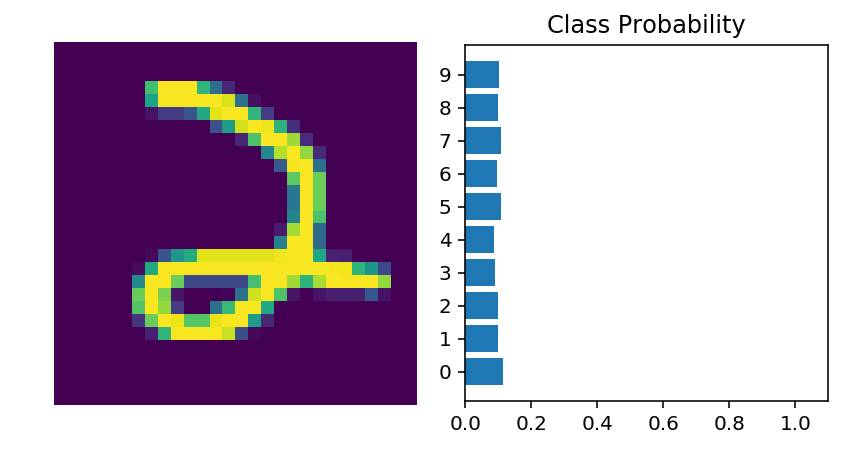

In [25]:
'''
    now we can pass an image to our network and see what happens
'''

# grab some data
dataitr = iter(trainloader)
images, labels = dataiter.next()

# resize images into a 1D vector
# new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784)

# forward pass through the network
img_index = 0
forward_pass = model.forward(images[img_index,:])

img = images[img_index]
helper.view_classify(img.view(1, 28, 28), forward_pass)

### Use `nn.Sequential` [documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


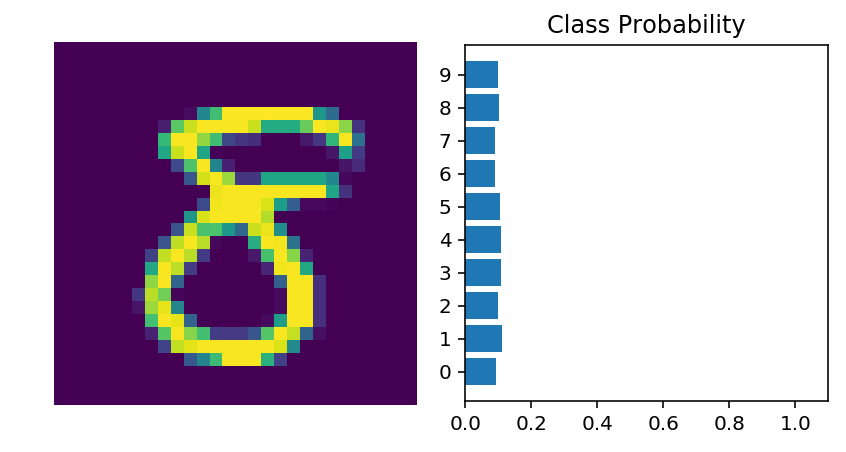

In [26]:
'''the probability distribution above shows that 
    the model doesn't know anything yet since the prediction seems same across all digits. 
    This is because the model hasnot been trained yet as all the weights are just random.

    We use `nn.sequential` to train the model 
    by passing the weights throught he sequence of operation:
'''
# Hyper parameters for our model
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# build a feed forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# forward pass through the network and display the output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
forward_pass = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), forward_pass)

In [27]:
# display the parameters of the each layer of the model
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 2.0123e-02, -1.1317e-03,  1.3058e-02,  ...,  2.6592e-03,
         -3.0242e-02, -1.3357e-02],
        [ 7.4546e-03, -2.1308e-02, -2.3042e-02,  ..., -2.6814e-02,
         -2.1718e-02,  1.5133e-02],
        [ 3.1570e-02,  3.4675e-03, -3.3131e-02,  ...,  1.2438e-02,
         -2.1248e-02, -4.5610e-04],
        ...,
        [ 2.8530e-02, -1.2617e-03, -5.4431e-03,  ...,  1.6183e-04,
         -5.4095e-03, -3.2139e-03],
        [-5.3887e-03,  1.0054e-02, -9.8153e-03,  ...,  3.1153e-02,
          3.5206e-03,  8.3543e-05],
        [ 1.6463e-02,  6.4527e-04, -1.0131e-02,  ..., -1.2101e-02,
          3.2281e-02, -2.6144e-02]], requires_grad=True)

In [28]:

#  we can also use the dictionary keys to provide 
#  the unique name for each layer
from collections import OrderedDict

In [29]:

model = nn.Sequential(OrderedDict([
    ('layer1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('layer2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_sizes[1], output_size)),
    ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [31]:
# now we can use those unique kyes to check the parameter instead of using the index
print(model[0])
# print(model.layer1)

Linear(in_features=784, out_features=128, bias=True)


### Training Neural Network

In [59]:
""" finding a function that maps our input to output
    loss function: a measure of the performance of the neural network
    Gradiant descent
    Backpropagation
    forward and backward pass
    """
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [78]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss

""" with softmax, cross entropy loss is used:
    to calculate the loss, we define the loss first adn then pass the output of our network and the correct labels"""
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
print(images.size)
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

<built-in method size of Tensor object at 0x1272e3140>
tensor(2.2937, grad_fn=<NllLossBackward>)


In [32]:
"""
    here we use the log softmax (allows us to get the probabilities 
    by taking the exponential torch.exp(output)),
    with the log-softmax, we use the negative log likelihood loss,    
"""

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax())
criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)

print(loss)

tensor(2.3213, grad_fn=<NllLossBackward>)


/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [33]:
from torch import optim

In [34]:
"""
    training the entire datasets with 
    gradient descent using grad module
    and optimizing the model using optim package
"""

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax())
criterion = nn.NLLLoss()# negative log likelihood loss
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Training loss: ")
        print(running_loss/len(trainloader))

Training loss: 
1.982573050044493
Training loss: 
0.939997516016462
Training loss: 
0.5557880917274113
Training loss: 
0.43828705683954233
Training loss: 
0.38701549232768606


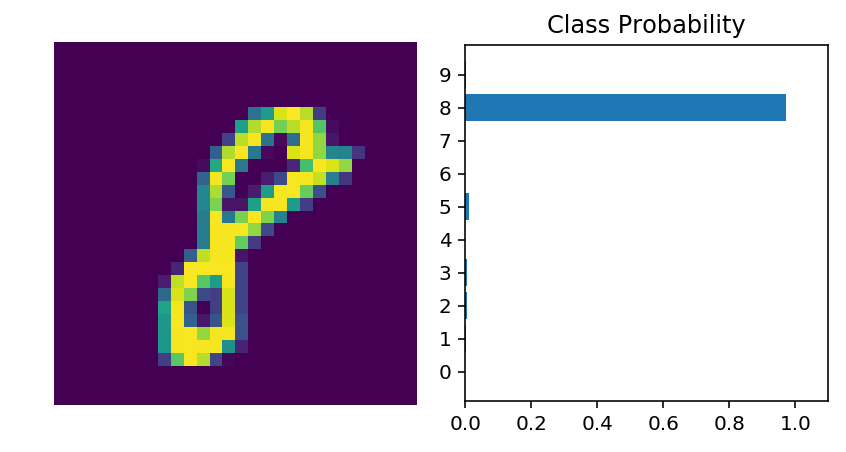

In [37]:
# display the result

%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

### Fashion-MNIST prediction

In [40]:
import torch
from torch import nn, optim
from torchvision import transforms, datasets
import helper # custom made file in the directory
import torch.nn.functional as f

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

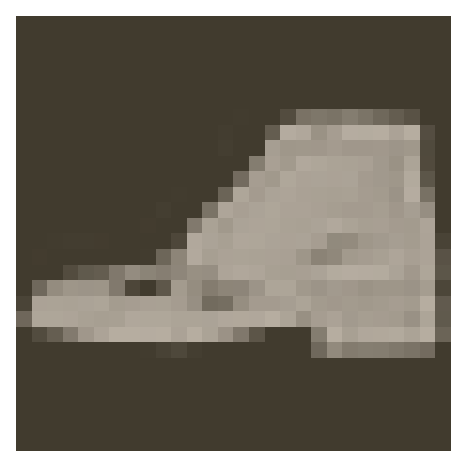

In [41]:
images, labels = next(iter(trainloader))
helper.imshow(images[0])


In [42]:
# the network architecture
class neural_network(nn.Module):
    def __init__(self):
        super(neural_network, self).__init__()
        self.layer1 = nn.Linear(784, 264)
        self.layer2 = nn.Linear(264, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, data):
        data = data.view(data.shape[0], -1)
        data = f.relu(self.layer1(data))
        data = f.relu(self.layer2(data))
        data = f.relu(self.layer3(data))
        data = f.log_softmax(self.layer4(data), dim=1)
        
        return data
    
# can also be defined using the sequential model
# model = nn.Sequential(nn.Linear(784, 256),
#                       nn.ReLU(),
#                       nn.Linear(256, 128),
#                       nn.ReLU(),
#                       nn.Linear(128, 64),
#                       nn.ReLU(),
#                       nn.Linear(64, 10),
#                       nn.LogSoftmax())

In [43]:
model = neural_network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [44]:
# train the networl
epochs = 5
for i in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1) # flatten the input data
        optimizer.zero_grad() # clear the gradients since they get accumulated
        
        # deploy the four stpes of training:
        output = model.forward(images) # forward pass to get output
        loss = criterion(output, labels) # loss calculation
        loss.backward() # backward pass of loss
        optimizer.step() # weights update
        
        running_loss += loss.item()
    else:
        print("training loss: ")
        print(running_loss/len(trainloader))

training loss: 
0.647677791048723
training loss: 
0.41942199117847595
training loss: 
0.3690807625635473
training loss: 
0.3359951555713026
training loss: 
0.3180160491880196


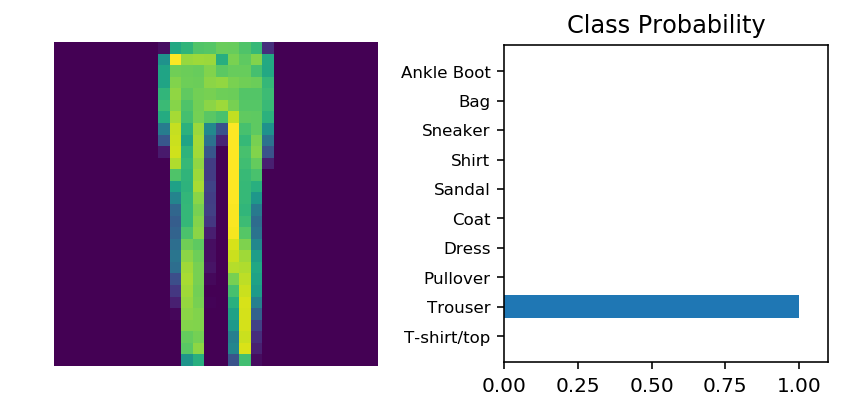

In [47]:
%matplotlib inline

images, labels = next(iter(testloader))
image = images[0].view(1, 784)

# turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(image)
    probabilities = f.softmax(logits, dim=1)
helper.view_classify(image.view(1, 28, 28), probabilities, version='Fashion')

In [ ]:
"""FUCKING HELL!! THIS IS AWESOME!!!"""

### Validation

> Now the model is trained, we can make it even better by using validation. Validation is prediction of our model that is performed in test data (unseeen data by the model). If we graph the train loss and test loss we will see that test loss gets higher, this is because the model is failing to generalize the train data, which means model is not good enough to predict on the unseen data. This is also known as VOERFITTING, and to avoid this we will use sth called overfitting.


In [58]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data, `train=False`
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [60]:
class neural_network(nn.Module):
    def __init__(self):
        super(neural_network, self).__init__()
        self.layer1 = nn.Linear(784, 264)
        self.layer2 = nn.Linear(264, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, data):
        data = data.view(data.shape[0], -1)
        data = f.relu(self.layer1(data))
        data = f.relu(self.layer2(data))
        data = f.relu(self.layer3(data))
        data = f.log_softmax(self.layer4(data), dim=1)
        
        return data

In [63]:
model = neural_network()

images, labels = next(iter(trainloader))
probabilities = torch.exp(model(images)) # get the class probabilites
print(probabilities.shape) # we should get 10 class probabilities for 64 input images

torch.Size([64, 10])


In [ ]:
# get the touple of top k values and corresponding top k classes
top_value, top_class = probabilities.topk(1, dim=1)

# look at the most likely classes for first 10 examples
print(top_class[:10,:])
# print(top_value[:10,:])

In [72]:
# now we compare the predicted classes and equal classes
# euqals will be like [1 0 1 1 0 0 0 1 1 1 1 . . .] of data type `torch.ByteTensor`
# if the labels are correctly predected then the result is assigned as 1 and 0 otherwise
equals = top_class == labels.view(top_class.shape)


In [73]:
"""
    equals = [1 0 1 1 0 0 0 1 1 1 1 . . .]
    calculating the accuracy is as simple as calculating the mean of the floating values of equals; 
    however, torch.mean does not support the data type of equals [torch.ByteTensor] therefore 
    we need to convert it to torch.FloatTensor
"""

accuracy = torch.mean(equals.type(torch.FloatTensor))
print('Accuracy:')
print(accuracy.item()*100)

Accuracy:
4.6875


In [55]:
# implementing validation
model = neural_network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        ## Implement the validation pass and print out the validation accuracy
        test_loss = 0
        accuracy = 0
        #turn off the gradients, since we do not update the parameters during validation
        with torch.no_grad():
            for images, labels in testloader:
                # pass the validation data through the model
                output = model(images)
                test_loss += criterion(output, labels)
                probabilities = torch.exp(output)
                # get the touple of top values and top class predicted
                top_value, top_class = probabilities.topk(1, dim=1)
                # compare the predicted class with the actual labels, returns floating values
                equals = top_class == labels.view(*top_class.shape)
                # calculate the mean of equals, or accuracy
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.513..  Test Loss: 0.443..  Test Accuracy: 0.837
Epoch: 2/30..  Training Loss: 0.393..  Test Loss: 0.416..  Test Accuracy: 0.846
Epoch: 3/30..  Training Loss: 0.356..  Test Loss: 0.405..  Test Accuracy: 0.853
Epoch: 4/30..  Training Loss: 0.329..  Test Loss: 0.376..  Test Accuracy: 0.871
Epoch: 5/30..  Training Loss: 0.315..  Test Loss: 0.382..  Test Accuracy: 0.870
Epoch: 6/30..  Training Loss: 0.301..  Test Loss: 0.382..  Test Accuracy: 0.861
Epoch: 7/30..  Training Loss: 0.293..  Test Loss: 0.374..  Test Accuracy: 0.871
Epoch: 8/30..  Training Loss: 0.284..  Test Loss: 0.357..  Test Accuracy: 0.873
Epoch: 9/30..  Training Loss: 0.272..  Test Loss: 0.364..  Test Accuracy: 0.878
Epoch: 10/30..  Training Loss: 0.263..  Test Loss: 0.372..  Test Accuracy: 0.874
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.370..  Test Accuracy: 0.874
Epoch: 12/30..  Training Loss: 0.250..  Test Loss: 0.366..  Test Accuracy: 0.884
Epoch: 13/30..  Training Loss: 0.249.

In [74]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

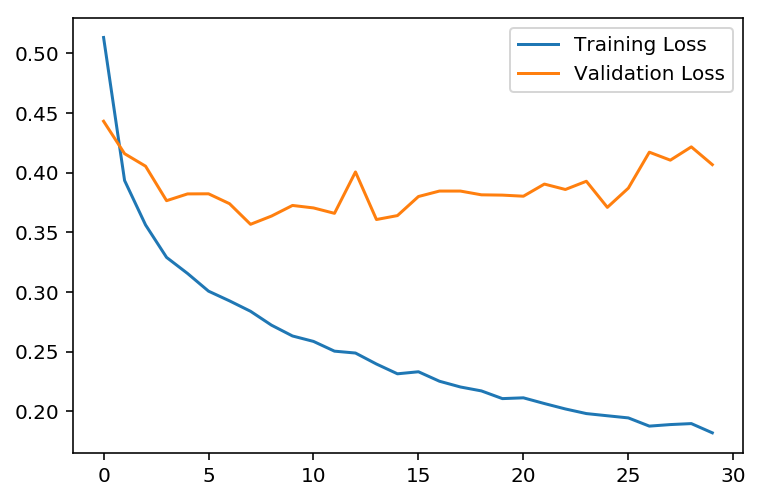

In [77]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.legend(frameon='False')

#### *Overfitting*

The huge difference between the training loss and the validation loss as shown is the above graph is what is knwn as overfitting.

The network learns the training set better and better, resulting in lower training losses. However, it starts having problems generalizing to data outside the training set leading to the validation loss increasing. 

The ultimate goal of any deep learning model is to make predictions on new data, so we should strive to get the lowest validation loss possible. **One option is to use the version of the model with the lowest validation loss, here the one around 8-10 training epochs. This strategy is called *early-stopping*.** In practice, you'd save the model frequently as you're training then later choose the model with the lowest validation loss.

The most common method to reduce overfitting (outside of early-stopping) is *dropout*, where we randomly drop input units. This forces the network to share information between weights, increasing it's ability to generalize to new data. Adding dropout in PyTorch is straightforward using the [`nn.Dropout`](https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout) module.

```python
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
```

During training we want to use dropout to prevent overfitting, but during inference we want to use the entire network. So, **we need to turn off dropout during validation, testing, and whenever we're using the network to make predictions. To do this, you use** `model.eval()`. **This sets the model to evaluation mode where the dropout probability is 0. You can turn dropout back on by setting the model to train mode with** `model.train()`. In general, the pattern for the validation loop will look like this, where you turn off gradients, set the model to evaluation mode, calculate the validation loss and metric, then set the model back to train mode.

```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

In [83]:
class neural_network(nn.Module):
    def __init__(self):
        super(neural_network, self).__init__()
        
        self.layer1 = nn.Linear(784, 264)
        self.layer2 = nn.Linear(264, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2) # drop out with the probability of 0.2
    def forward(self, data):
        data = data.view(data.shape[0], -1)
        
        data = self.dropout(f.relu(self.layer1(data)))
        data = self.dropout(f.relu(self.layer2(data)))
        data = self.dropout(f.relu(self.layer3(data)))
        data = f.log_softmax(self.layer4(data), dim=1) # no dropout in the output since we want all classes :D
        
        return data

In [85]:
## Train your model with dropout, and monitor the training progress with the validation loss and accuracy
model = neural_network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)
epochs = 30

train_losses, test_losses = [], []
for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad(): # turns off gradients, saves memory and boosts speed
            model.eval() # turns off the drop out
            for images, labels in testloader:
                output = model(images)
                test_loss += criterion(output, labels)
                probabilities = torch.exp(output)
                
                top_value, top_class = probabilities.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train() # truns back the dropout on
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(i+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/30..  Training Loss: 2.186..  Test Loss: 1.891..  Test Accuracy: 0.406
Epoch: 2/30..  Training Loss: 1.511..  Test Loss: 1.075..  Test Accuracy: 0.659
Epoch: 3/30..  Training Loss: 1.032..  Test Loss: 0.810..  Test Accuracy: 0.715
Epoch: 4/30..  Training Loss: 0.851..  Test Loss: 0.709..  Test Accuracy: 0.741
Epoch: 5/30..  Training Loss: 0.761..  Test Loss: 0.657..  Test Accuracy: 0.752
Epoch: 6/30..  Training Loss: 0.710..  Test Loss: 0.624..  Test Accuracy: 0.763
Epoch: 7/30..  Training Loss: 0.675..  Test Loss: 0.602..  Test Accuracy: 0.767
Epoch: 8/30..  Training Loss: 0.646..  Test Loss: 0.580..  Test Accuracy: 0.780
Epoch: 9/30..  Training Loss: 0.625..  Test Loss: 0.561..  Test Accuracy: 0.790
Epoch: 10/30..  Training Loss: 0.604..  Test Loss: 0.551..  Test Accuracy: 0.794
Epoch: 11/30..  Training Loss: 0.584..  Test Loss: 0.533..  Test Accuracy: 0.801
Epoch: 12/30..  Training Loss: 0.570..  Test Loss: 0.522..  Test Accuracy: 0.805
Epoch: 13/30..  Training Loss: 0.556.

In [86]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

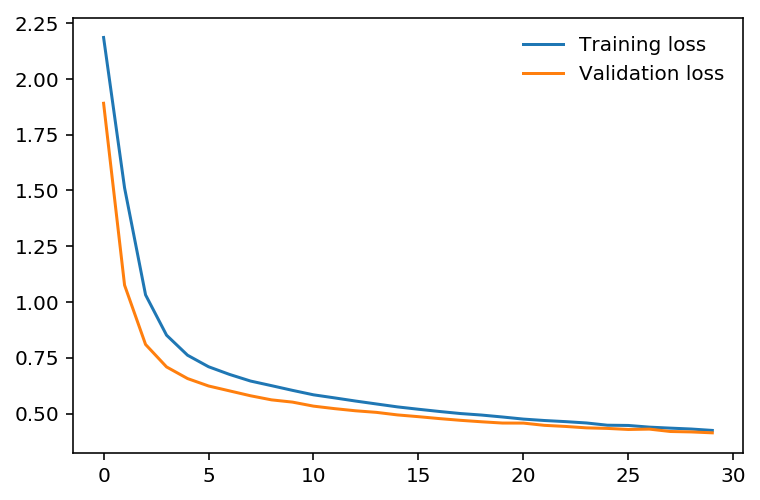

In [87]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

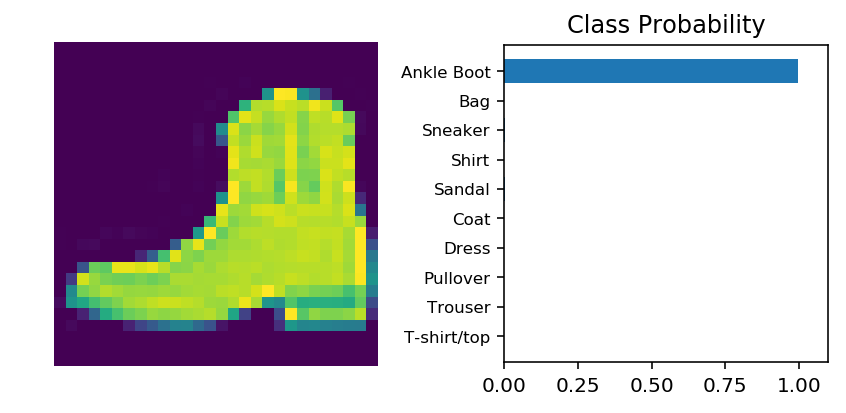

In [88]:
"""
    Predection
"""

# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')